In [2]:
from tqdm import tqdm
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from collections import deque
import gym

import torch
from torch.optim import Adam
from torch.utils.tensorboard import SummaryWriter

# configure module & syspath
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.agents import DoubleDQN as DDQN
from src.policies import CartPolePolicy
from src.replays import VanillaReplay

In [4]:
cart_pole_env = gym.make('CartPole-v1')
policy = CartPolePolicy(cart_pole_env.observation_space.shape[0], cart_pole_env.action_space.n)
replay_memory = VanillaReplay(capacity = 500)
optimizer = Adam(policy.parameters(), lr = 0.001)

dqn = DDQN(
  env = cart_pole_env,
  policy = policy,
  replay_memory = replay_memory,
  replay_size = 32,
  min_replay_history = 200,
  optimizer = optimizer,
  discount_rate = 0.999,
  max_epsilon = 1.,
  min_epsilon = 0.1,
  epsilon_decay = 1e-3,
  target_update_steps = 10,
)

In [5]:
max_episodes = 500
rewards_last_10 = deque()

plt_epsilon = list()
plt_rewards_median = list()

for epi in tqdm(range(max_episodes)):
    episode_transitions = dqn.play_episode(tune = True)
    rewards_last_10.append(np.sum(list(zip(*episode_transitions))[2]))

    median_reward = np.median(rewards_last_10)
    plt_rewards_median.append(median_reward)

    if len(rewards_last_10) == 10:
        rewards_last_10.popleft()
    
    # check if the policy is fully trained.
    if median_reward > 190.:
        break

 14%|██████████████████████████████▌                                                                                                                                                                                                  | 68/500 [13:56<1:28:34, 12.30s/it]


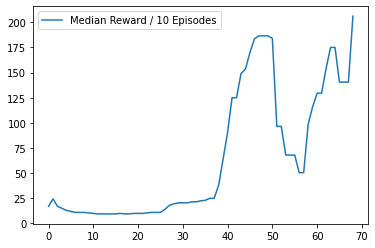

In [6]:
plt.plot(plt_rewards_median, label = 'Median Reward / 10 Episodes')
plt.legend()
plt.show()